In [1]:
pip install numpy scipy matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\aidan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import all our necessary libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ','.
# Your data should have five columns - elapsed time, ultrasonic sensor distance, acceleration in x direction, acceleration in y direction, acceleration in z direction
read_in_array1 = np.loadtxt('Trial 1.txt', delimiter=',')
read_in_array2 = np.loadtxt('Trial 2.txt', delimiter=',')
read_in_array3 = np.loadtxt('Trial 3.txt', delimiter=',')
read_in_array4 = np.loadtxt('Trial 4.txt', delimiter=',')
read_in_array5 = np.loadtxt('Trial 5.txt', delimiter=',')
read_in_array6 = np.loadtxt('Trial 6.txt', delimiter=',')
read_in_array7 = np.loadtxt('Trial 7.txt', delimiter=',')
print("hello")
print("hello2")
print("aidan was here! ! ! ! ! !cookie ")

hello
hello2
aidan was here! ! ! ! ! !cookie 


[-6.68098522e-04  4.00245820e+00]
[[ 3.04798090e-11 -3.42438042e-07]
 [-3.42438042e-07  5.30738476e-03]]
[-0.00060398  0.13212437]
[[ 1.78684675e-13 -7.79461935e-10]
 [-7.79461935e-10  1.23557545e-05]]
[-5.27863445e-04 -1.66282464e+00]
[[ 9.91384478e-12 -4.02112828e-08]
 [-4.02112828e-08  9.62094461e-04]]


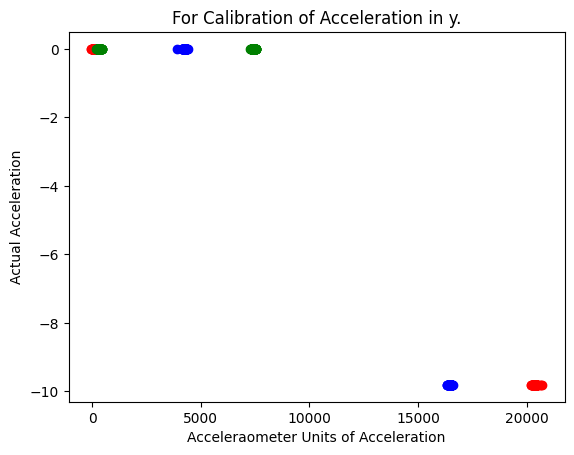

In [6]:
read_in_array_x = np.loadtxt('proj_calibration-x.txt', delimiter = ',')
read_in_array_y = np.loadtxt('proj_calibration-y.txt', delimiter = ',') 
read_in_array_z = np.loadtxt('proj_calibration-z.txt', delimiter = ',') 

# Extract the time, distance, and accelerometer outputs in the x, y, and z directions
# Here, x_calibration refers to the orientation of the Arduino - the Arduino here is being calibrated in the x-direction
# time, dist refer to the time in milliseconds and the distance in centimeters read by the Arduino
# ax, ay, az refer to the accelerometer readings in the x, y, and z directions
#For the x 
x_calibration_time = read_in_array_x[:,0] / 1000
x_calibration_dist = read_in_array_x[:,1] / 100
x_calibration_ax = read_in_array_x[:,2]
x_calibration_ay = read_in_array_x[:,3]
x_calibration_az = read_in_array_x[:,4]

# For the y 
y_calibration_time = read_in_array_y[:,0] / 1000
y_calibration_dist = read_in_array_y[:,1] / 100
y_calibration_ax = read_in_array_y[:,2]
y_calibration_ay = read_in_array_y[:,3]
y_calibration_az = read_in_array_y[:,4]
#For the z 
z_calibration_time = read_in_array_z[:,0] / 1000
z_calibration_dist = read_in_array_z[:,1] / 100
z_calibration_ax = read_in_array_z[:,2]
z_calibration_ay = read_in_array_z[:,3]
z_calibration_az = read_in_array_z[:,4]

# Use np.ones() to generate the accelerations in the correct axis and np.zeros() to generate the accelerations in the incorrect axes
# These true_ax, true_ay, true_az refer to the actual accelerations experienced by the accelerometer in the x, y, and z directions (in m/s^2)

x_calibration_true_ax = np.ones(len(read_in_array_x)) * -9.81
x_calibration_true_ay = np.zeros(len(read_in_array_x))
x_calibration_true_az = np.zeros(len(read_in_array_x))

# Repeat this for the y and z axis calibrations
#Repetated for y 
y_calibration_true_ax = np.zeros(len(read_in_array_y)) 
y_calibration_true_ay = np.ones(len(read_in_array_y))* -9.81
y_calibration_true_az = np.zeros(len(read_in_array_y))

#Repeated for z 
z_calibration_true_ax = np.zeros(len(read_in_array_z)) 
z_calibration_true_ay = np.zeros(len(read_in_array_z))
z_calibration_true_az = np.ones(len(read_in_array_z))* -9.81

# Use plt.scatter() to plot true acceleration vs. accelerometer output in the x direction

plt.scatter(x_calibration_ax, x_calibration_true_ax, c = 'red')
plt.scatter(y_calibration_ax, y_calibration_true_ax, c = 'blue')
plt.scatter(z_calibration_ax, z_calibration_true_ax , c = 'green')

plt.title('For Calibration of Acceleration in x.')
plt.xlabel("Acceleraometer Units of Acceleration") 
plt.ylabel("Actual Acceleration")

# Include title, axis labels, legend (accelerometer output has no units)

 #Repeat the above for the y direction
plt.scatter(x_calibration_ay, x_calibration_true_ay, c = 'red')
plt.scatter(y_calibration_ay, y_calibration_true_ay, c = 'blue')
plt.scatter(z_calibration_ay, z_calibration_true_ay , c = 'green')

plt.title('For Calibration of Acceleration in y.')
plt.xlabel("Acceleraometer Units of Acceleration") 
plt.ylabel("Actual Acceleration")

# Combine the accelerometer outputs in the x direction and the true accelerations in the x direction
#fOR X
output_ax = np.append(x_calibration_ax, np.append(y_calibration_ax, z_calibration_ax))
true_ax = np.append(x_calibration_true_ax, np.append(y_calibration_true_ax, z_calibration_true_ax))
#F
output_ay = np.append(x_calibration_ay, np.append(y_calibration_ay, z_calibration_ay))
true_ay = np.append(x_calibration_true_ay, np.append(y_calibration_true_ay, z_calibration_true_ay))

output_az = np.append(x_calibration_az, np.append(y_calibration_az, z_calibration_az))
true_az = np.append(x_calibration_true_az, np.append(y_calibration_true_az, z_calibration_true_az))

# Repeat this for the y and z directions


# Use np.polyfit() to extract the fit coefficients and uncertainties for each of the directions

coeff_x, cov_x = np.polyfit(output_ax, true_ax, 1, cov=True)
coeff_y, cov_y = np.polyfit(output_ay, true_ay, 1, cov=True)
coeff_z, cov_z = np.polyfit(output_az, true_az, 1, cov=True)

# Print the coefficients and covariance matrices:

print(coeff_x)
print(cov_x)
print(coeff_y)
print(cov_y)
print(coeff_z)
print(cov_z)

# Define a function to convert the accelerometer output in the x direction to the true acceleration

def output_to_accel_x(output):
  accel = output*coeff_x[0]+coeff_x[1]
  return accel

# Define a function to convert the accelerometer output in the y direction to the true acceleration

def output_to_accel_y(output):
  accel = output*coeff_y[0]+coeff_y[1]
  return accel

# Define a function to convert the accelerometer output in the z direction to the true acceleration
def output_to_accel_z(output):
  accel = output*coeff_z[0]+coeff_z[1]
  return accel



In [7]:
#measured angle = 8.24 degrees
#g = 9.81

In [8]:
#We can calculate theoretical acceleration with gsintheta
# m = 0.613 kg

In [10]:
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array1[:,0]

# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (time-time[0]) / 1000.

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array1[:,2]

# We define our calibration function from calibrating our accelerometer (we need to input the slope and intercept here)
#def output_to_accel_x(output):
  #accel = -.000668098522*output + 4.00245820
  #return accel

#def output_to_accel_y(output):
  #accel = output*-0.0060398+0.13212437
  #return accel
acc_data = output_to_accel_x(acc_data_unrefined) - 9.81

#def output_to_accel_z(output):
  #accel = output*-.0000000402112828+ .000962094461
  #return accel




In [ ]:

elapsed_time_window = elapsed_time
acc_data1 = output_to_accel_x(acc_data_unrefined1) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time,acc_data1,color="blue")

# Provide a title to the plot
plt.title('Acceleration vs time plot')
# Label the y-axis
plt.ylabel('Acceleration (m/s^2)')
# Label the x-axis
plt.xlabel('Time (s)')

NameError: name 'acc_data' is not defined

Text(0.5, 0, 'Time (s)')

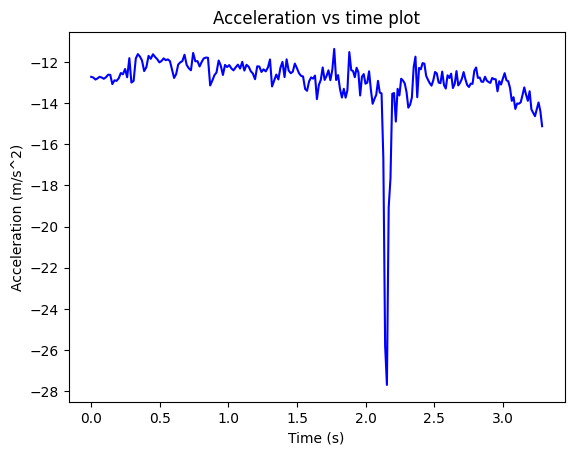

In [11]:

time2 = read_in_array2[:,0]

elapsed_time2 = (time2-time2[0]) / 1000.


acc_data_unrefined2 = read_in_array2[:,2]
acc_data2 = output_to_accel_x(acc_data_unrefined2) - 9.81



#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time2,acc_data2,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

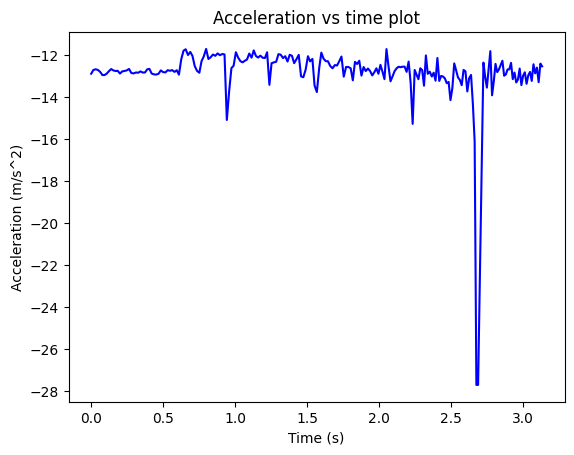

In [12]:

time3 = read_in_array3[:,0]

elapsed_time3 = (time3-time3[0]) / 1000.


acc_data_unrefined3 = read_in_array3[:,2]
acc_data3 = output_to_accel_x(acc_data_unrefined3) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time3,acc_data3,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

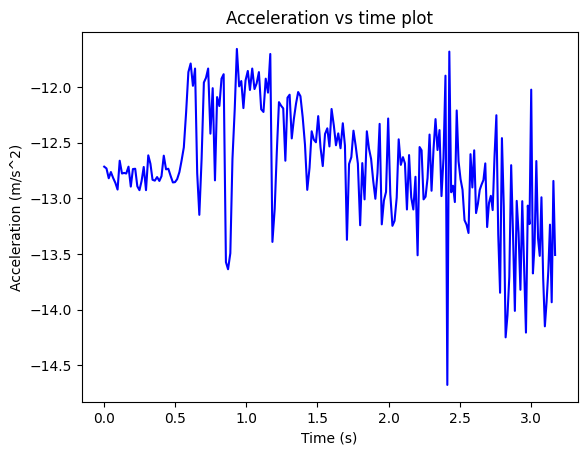

In [13]:

time4 = read_in_array4[:,0]

elapsed_time4 = (time4-time4[0]) / 1000.


acc_data_unrefined4 = read_in_array4[:,2]
acc_data4 = output_to_accel_x(acc_data_unrefined4) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time4,acc_data4,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

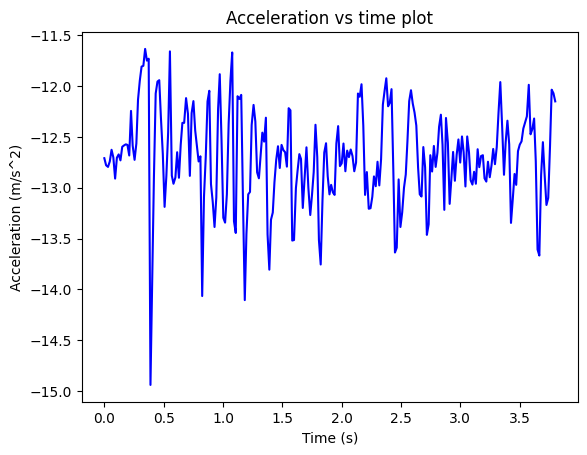

In [14]:

time5 = read_in_array5[:,0]

elapsed_time5 = (time5-time5[0]) / 1000.


acc_data_unrefined5 = read_in_array5[:,2]
acc_data5 = output_to_accel_x(acc_data_unrefined5) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time5,acc_data5,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

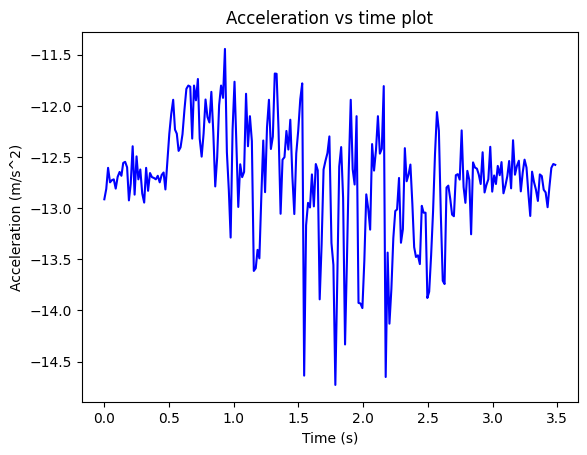

In [15]:

time6 = read_in_array6[:,0]

elapsed_time6 = (time6-time6[0]) / 1000.


acc_data_unrefined6 = read_in_array6[:,2]
acc_data6 = output_to_accel_x(acc_data_unrefined6) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time6,acc_data6,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

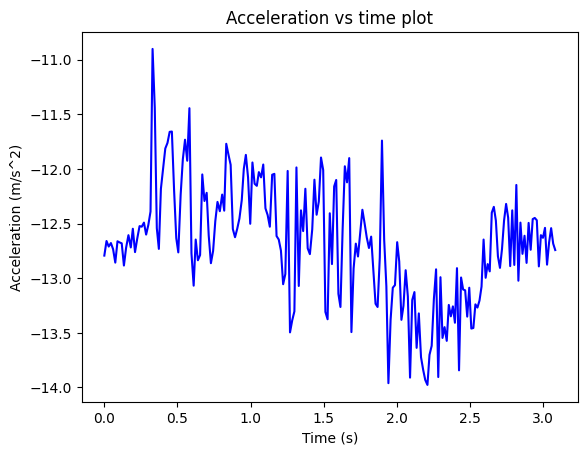

In [16]:

time7 = read_in_array7[:,0]

elapsed_time7 = (time7-time7[0]) / 1000.


acc_data_unrefined7 = read_in_array7[:,2]
acc_data7 = output_to_accel_x(acc_data_unrefined7) - 9.81


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time7,acc_data7,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')